<a href="https://colab.research.google.com/github/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/blob/master/Sesion-08/Reto-03/matriz_de_confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reto 3: Matriz de Confusión

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una matriz de confusión
    
---
    
### 2. Desarrollo:

En este Reto vamos a utilizar una matriz de confusión para evaluar el modelo que entrenamos en el Reto anterior. Tu Reto consiste en los siguientes pasos:

1. Copia el código del Reto anterior a este Reto, de manera que tengas un modelo entrenado que sea similar.
2. Obtén tu matriz de confusión utilizando `sklearn.metrics.confusion_matrix`.
3. Usando un mapa de calor (heatmap), grafica tu matriz de confusión de manera que sea muy claro y evidente lo que está pasando. Recuerda modificar tus estilos para que sean agradables a la vista.
4. Utilizando la matriz de confusión, obtén las medidas de Precisión, Exactitud, Sensibilidad y Especificidad. Evalúa tu modelo utilizando estas medidas.

> **Reto extra**: Para un reto extra, obtén las medidas del punto 4 sin utilizar los métodos `sklearn.metrics`. Recuerda que todas tus medidas de evaluación las puedes obtener usando aritmética simple y tu matriz de confusión.

# Solución

In [3]:
# Las básicas para manejo de datos
import pandas as pd
import numpy as np
# Para gráficas
import seaborn as sns
import matplotlib.pyplot as plt
# Las específicas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [4]:
path1 = "https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/master/"
df = pd.read_csv(path1 + 'Datasets/diabetes-clean.csv', index_col=0)


In [5]:
df.head()

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   diabetes_pedigree_function  age  outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1

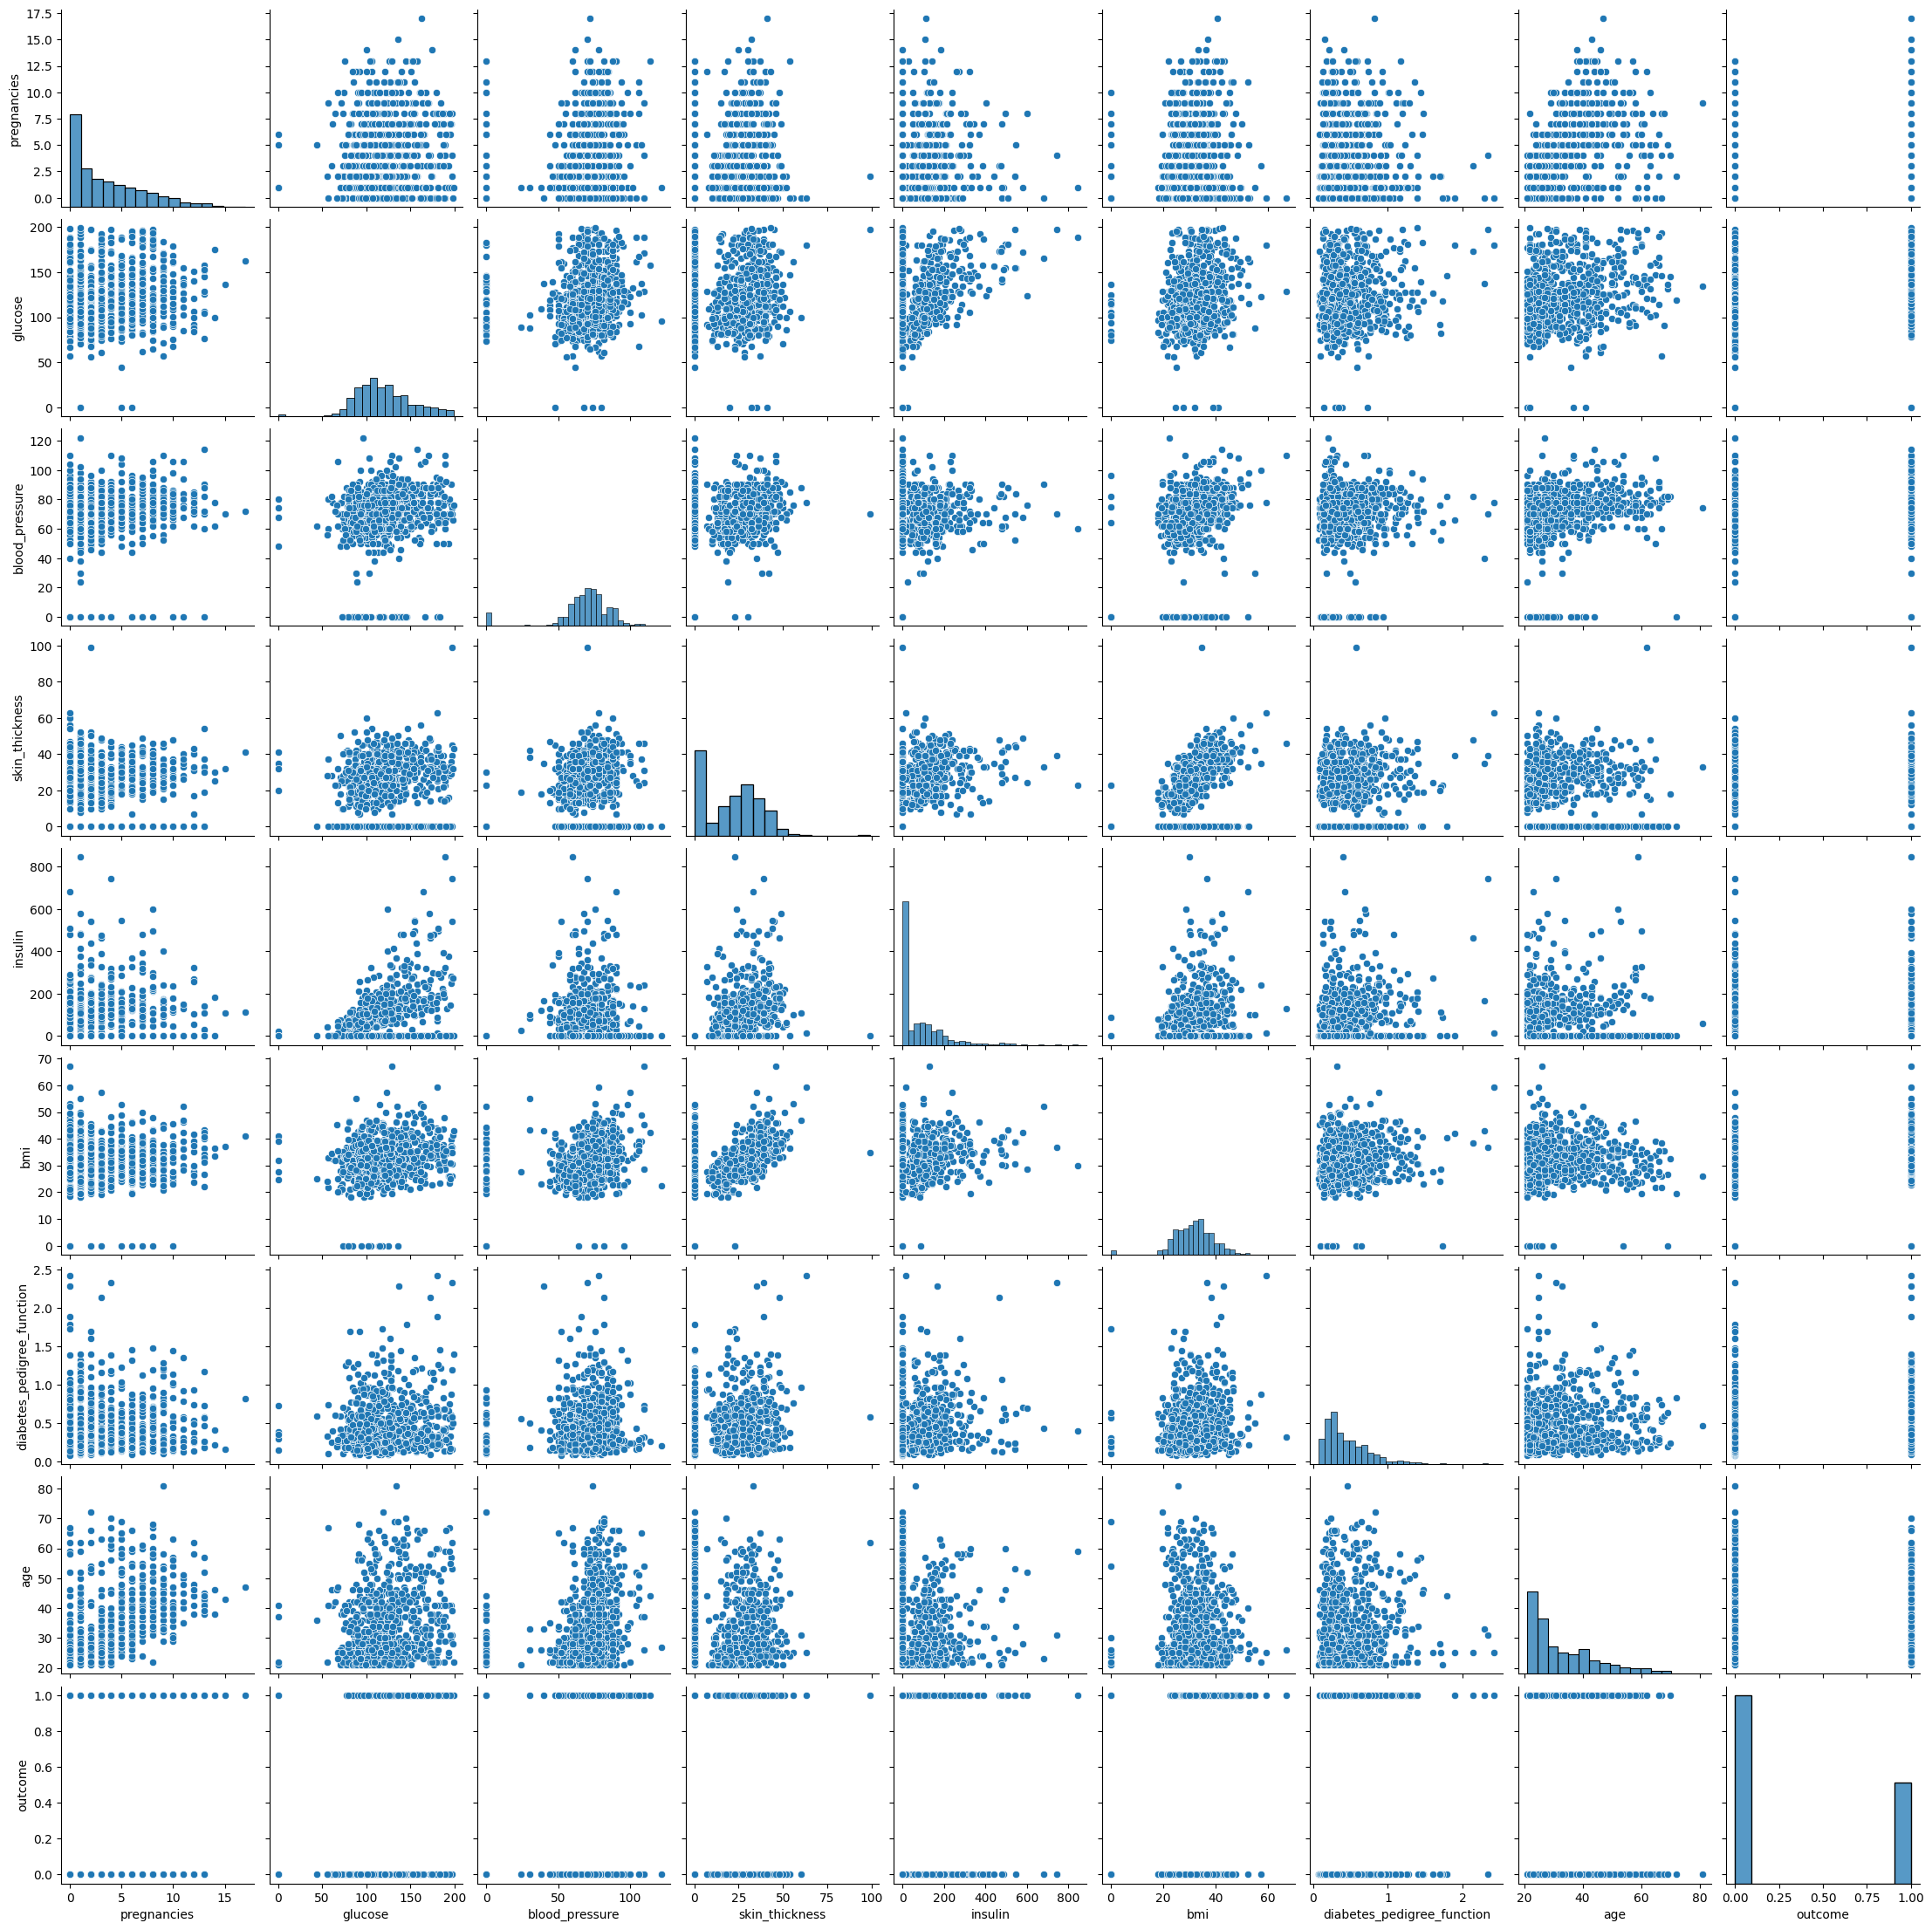

In [6]:
sns.pairplot(df)

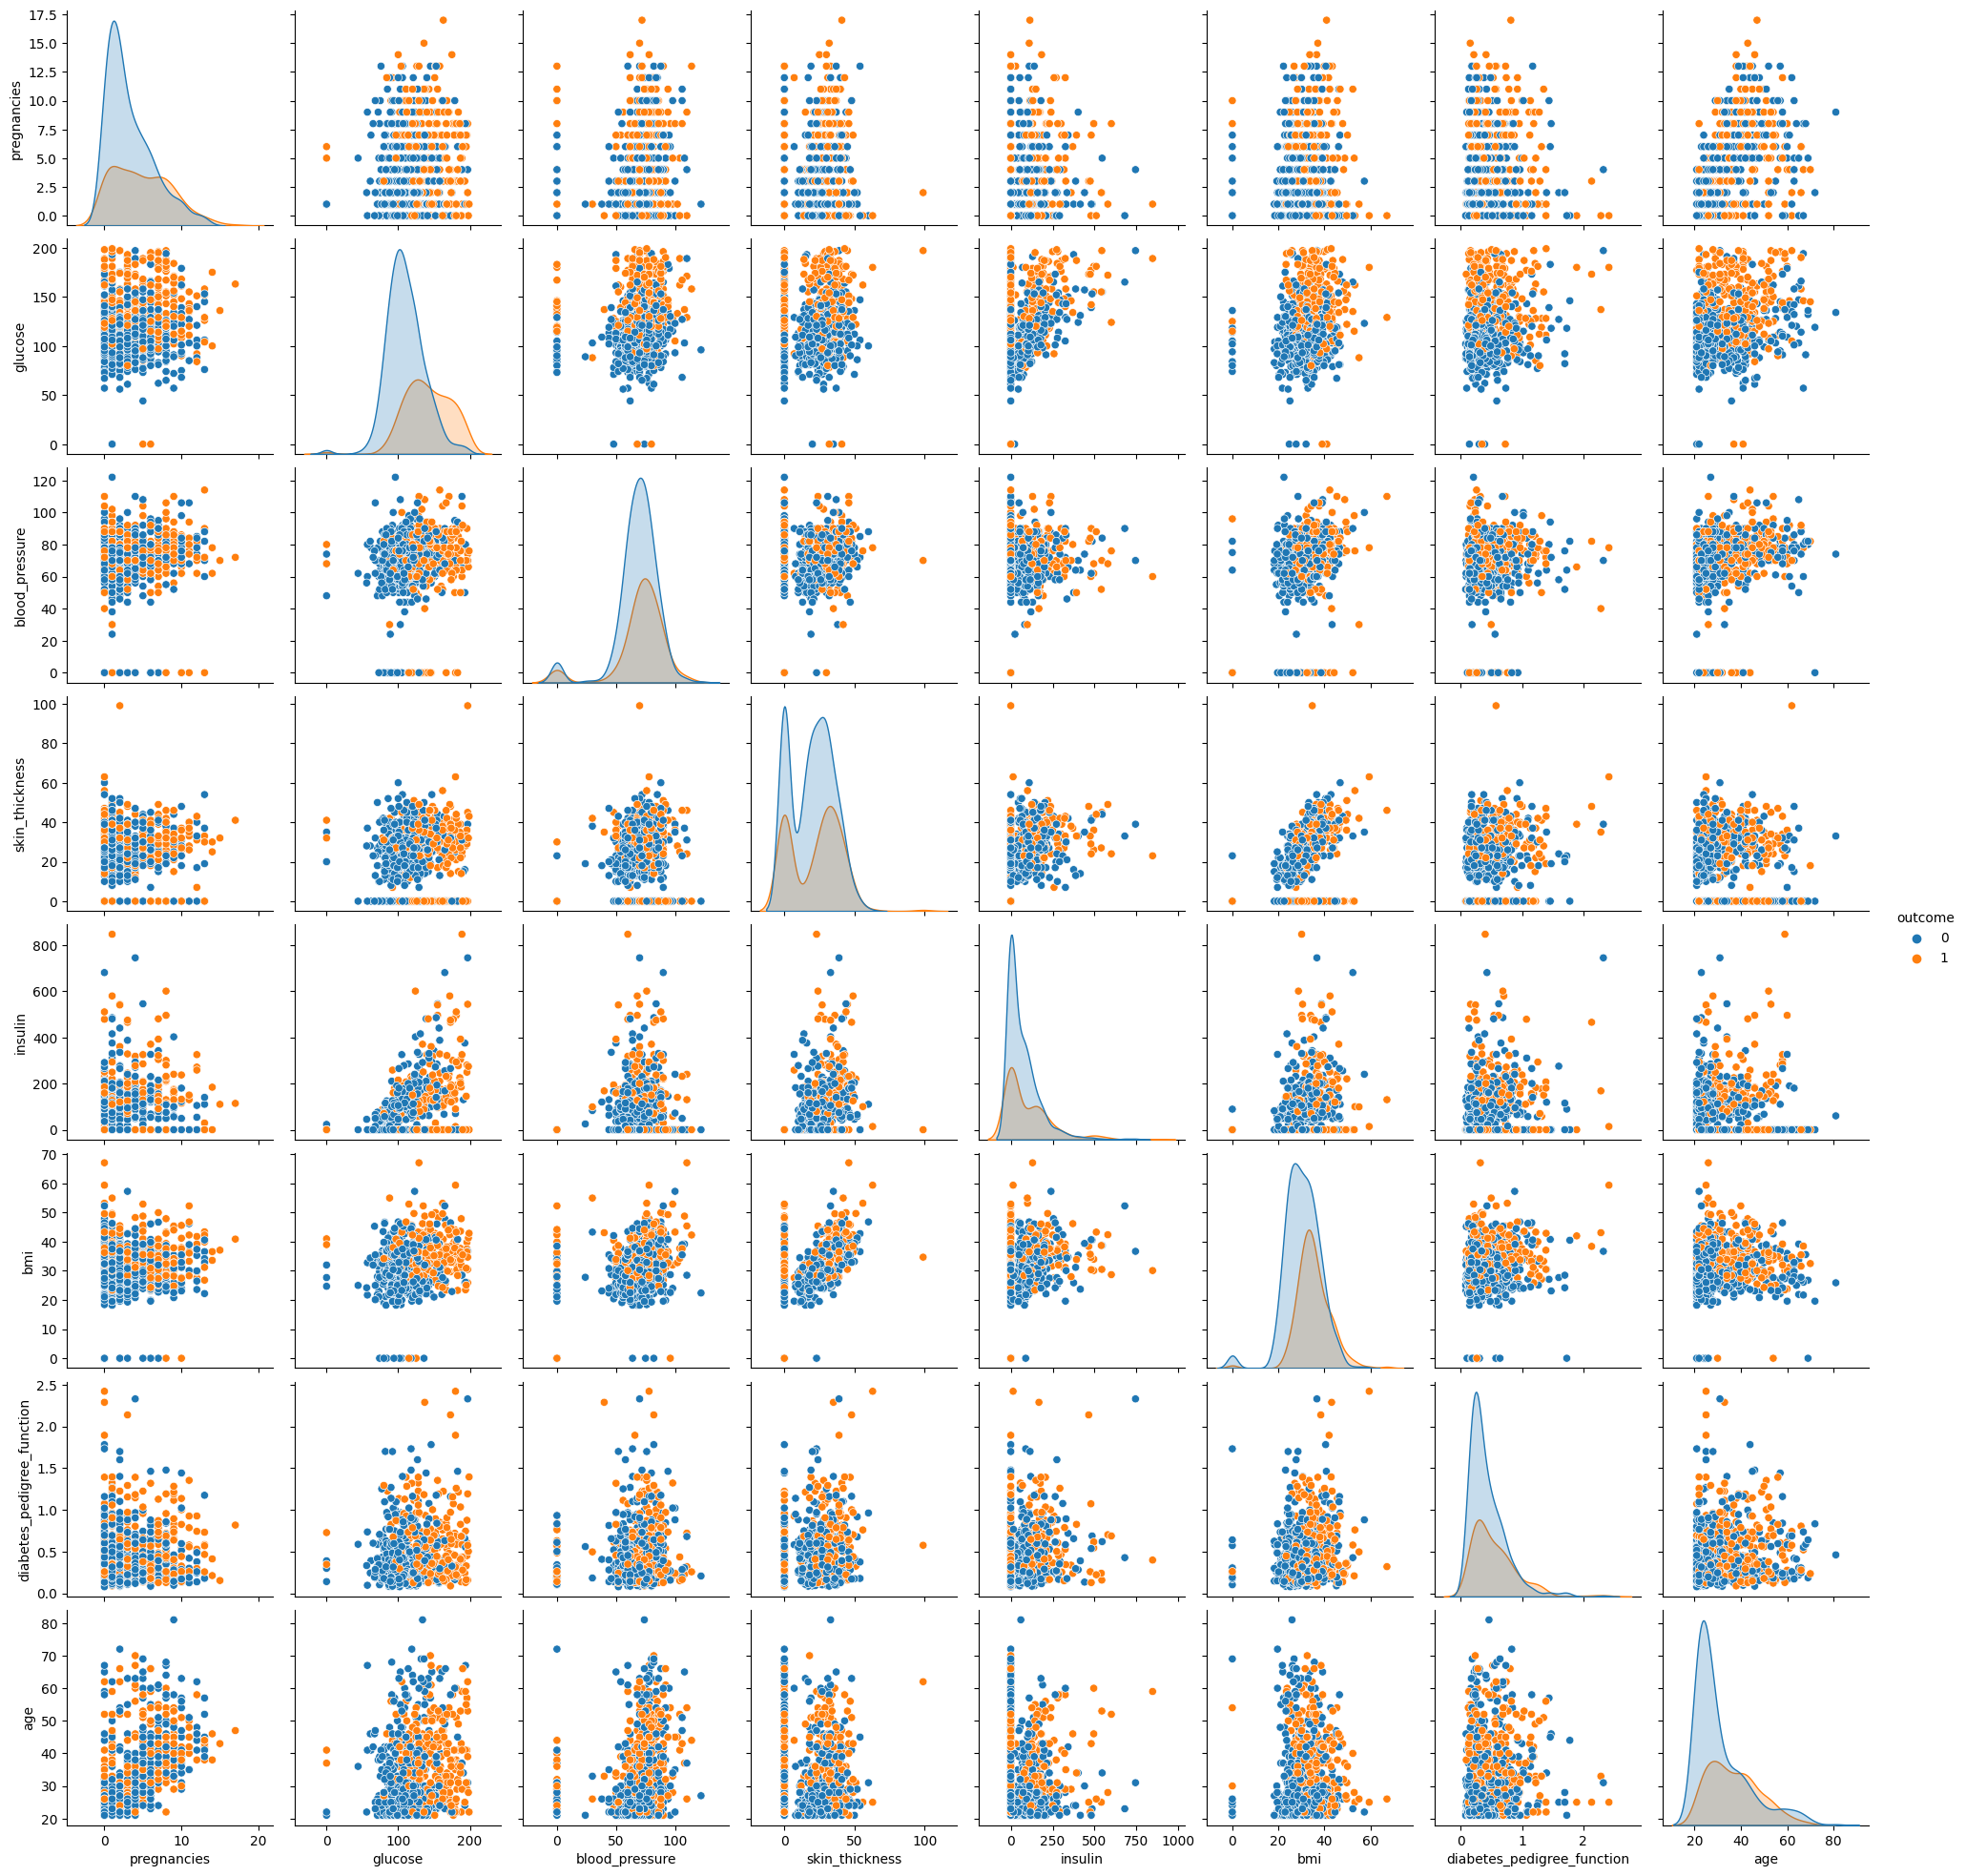

In [7]:
sns.pairplot(df, hue="outcome")

In [8]:
X = df.drop(columns=['outcome'])
y = df['outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [10]:
y_pred = logreg.predict(X_test)

In [11]:
X_test.head()

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
574            1      143              86              30      330  30.1   
462            8       74              70              40       49  35.3   
9              8      125              96               0        0   0.0   
95             6      144              72              27      228  33.9   
288            4       96              56              17       49  20.8   

     diabetes_pedigree_function  age  
574                       0.892   23  
462                       0.705   39  
9                         0.232   54  
95                        0.255   40  
288                       0.340   26

In [12]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [13]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[133,  20],
       [ 28,  50]])

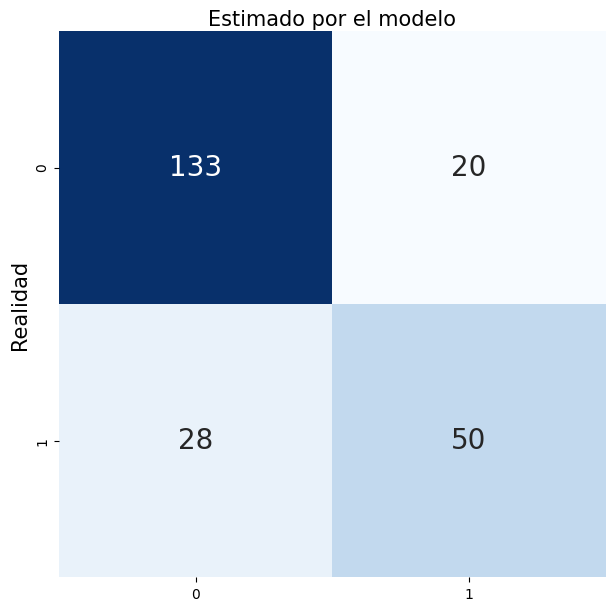

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [15]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7142857142857143
Exactitud: 0.7922077922077922
Sensibilidad: 0.6410256410256411
Especificidad: 0.869281045751634


In [16]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.72478431, 0.27521569],
       [0.77986187, 0.22013813],
       [0.97609814, 0.02390186],
       [0.46266446, 0.53733554],
       [0.93551538, 0.06448462],
       [0.8505511 , 0.1494489 ],
       [0.73444955, 0.26555045],
       [0.83128115, 0.16871885],
       [0.24430376, 0.75569624],
       [0.39203314, 0.60796686]])

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

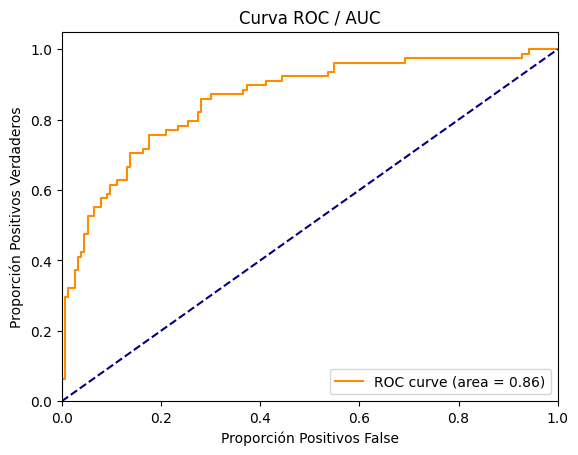

In [18]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

In [19]:
X_test['predichos'] = y_pred
X_test['outcome'] = y_test

In [20]:
X_test

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
574            1      143              86              30      330  30.1   
462            8       74              70              40       49  35.3   
9              8      125              96               0        0   0.0   
95             6      144              72              27      228  33.9   
288            4       96              56              17       49  20.8   
..           ...      ...             ...             ...      ...   ...   
170            6      102              82               0        0  30.8   
463            5       88              78              30        0  27.6   
436           12      140              85              33        0  37.4   
464           10      115              98               0        0  24.0   
520            2       68              70              32       66  25.0   

     diabetes_pedigree_function  age  predichos  outcome  
574                       0.892   23          0        0  
462                       0.705   39          0        0  
9                         0.232   54          0        1  
95                        0.255   40          1        0  
288                       0.340   26          0        0  
..                          ...  ...        ...      ...  
170                       0.180   36          0        1  
463                       0.258   37          0        0  
436                       0.244   41          1        0  
464                       1.022   34          0        0  
520                       0.187   25          0        0  

[231 rows x 10 columns]

In [21]:
dt = X_test.groupby('outcome')[['predichos']].sum()

In [22]:
dt.head

<bound method NDFrame.head of          predichos
outcome           
0               20
1               50>